In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from skimage import io, color, img_as_bool, exposure, transform, feature
%matplotlib inline

### Download images (.zip, Google Drive, ~1GB) [here](https://drive.google.com/file/d/1MEx7txB-U7gpM6P58cOMmanW-SsbDw5v/view?usp=sharing)

Save the zip where you want to store the images and unzip it

In [2]:
# file paths
ci_path = '/Users/zhanyu/Documents/DSI/Projects/final_assignment_2 copy/plane_data/cropped_images/'

l_file = '/Users/zhanyu/Documents/DSI/Projects/final_assignment_2 copy/plane_data/plane_labels.csv'

(360, 640, 4)


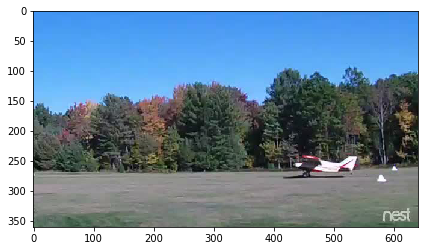

In [4]:
img_raw = io.imread('2016-10-10T19+44+49_610Z')
print(img_raw.shape)
io.imshow(img_raw);

## scikit image

#### helpful submodules and methods for image processing and feature extraction

* [io](http://scikit-image.org/docs/dev/api/skimage.io.html)  
* [color](http://scikit-image.org/docs/dev/api/skimage.color.html)  
* [exposure](http://scikit-image.org/docs/dev/api/skimage.exposure.html)   
* [transform](http://scikit-image.org/docs/dev/api/skimage.transform.html)   
* [feature](http://scikit-image.org/docs/dev/api/skimage.feature.html)  
* [img_as_bool](http://scikit-image.org/docs/dev/api/skimage.html#img-as-bool)   

#### other resources

* [RGBA](https://en.wikipedia.org/wiki/RGBA_color_space)  


In [5]:
# all labels
plane_data = pd.read_csv(l_file)
print(plane_data.head())
print(plane_data.shape)

                   img_name  plane
0  2016-08-02T13+50+24_430Z  False
1  2016-08-02T14+12+37_390Z  False
2  2016-08-02T22+20+26_600Z  False
3  2016-08-03T12+04+30_670Z  False
4  2016-08-03T12+32+21_790Z  False
(6758, 2)


### let's look at some images that contain an airplane

In [6]:
# filter to include only the airplane images
print(plane_data['plane'].sum())
aircraft = plane_data[plane_data['plane']==True]
print(aircraft.shape)

101
(101, 2)


In [7]:
# take a random subset of 20 of the airplane images
aircraft_subset = aircraft.sample(20)
print(aircraft_subset.shape)

(20, 2)


In [10]:
aircraft_subset.head()

,img_name,plane
2923,2017-07-03T14+03+29_240Z,True
2996,2017-07-05T14+17+45_330Z,True
4696,2017-10-19T15+43+17_790Z,True
920,2016-10-07T17+44+06_330Z,True
3999,2017-09-01T18+32+00_480Z,True


/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/skimage/util/dtype.py:131: UserWarning: Possible sign loss when converting negative image of type float64 to positive image of type bool.
  .format(dtypeobj_in, dtypeobj_out))
/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to bool
  .format(dtypeobj_in, dtypeobj_out))


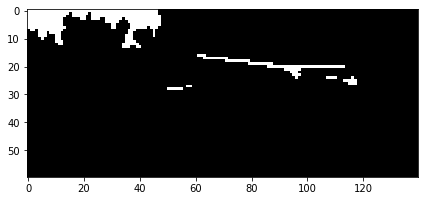

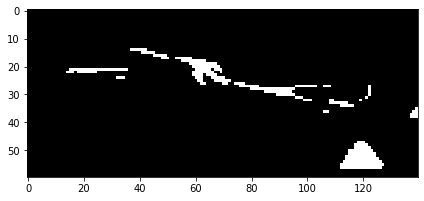

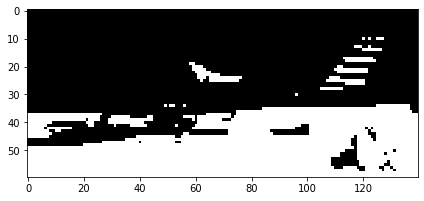

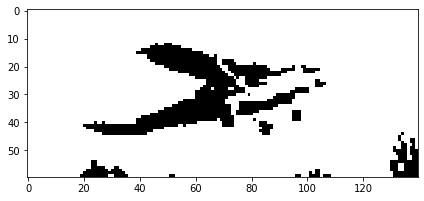

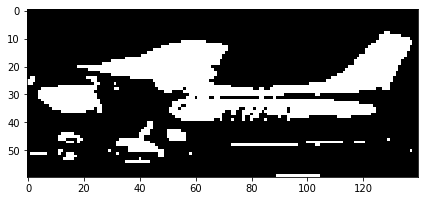

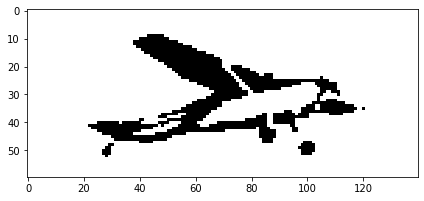

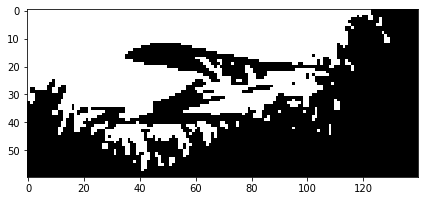

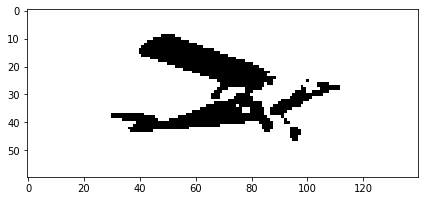

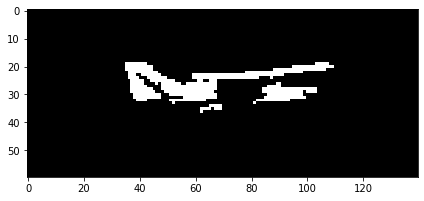

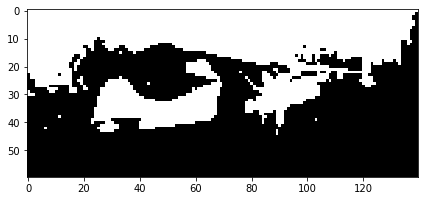

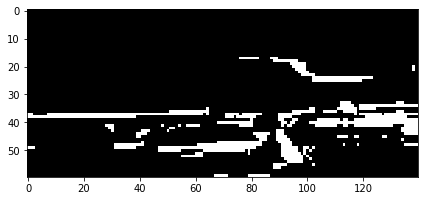

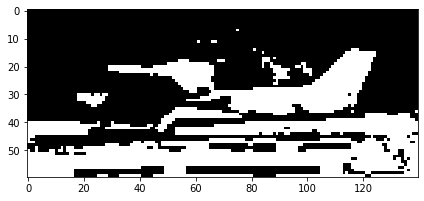

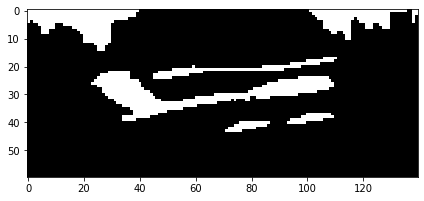

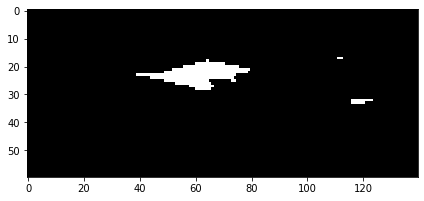

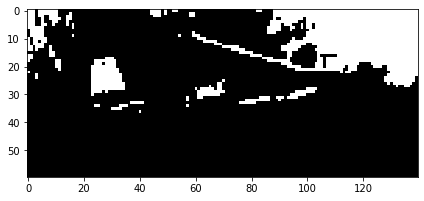

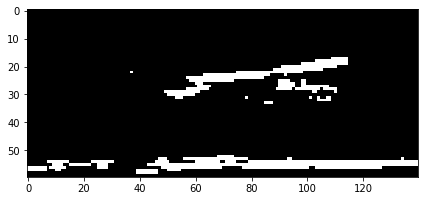

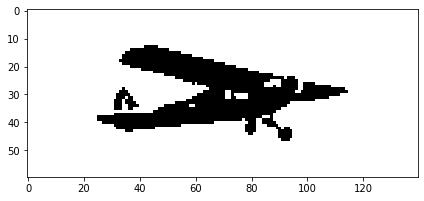

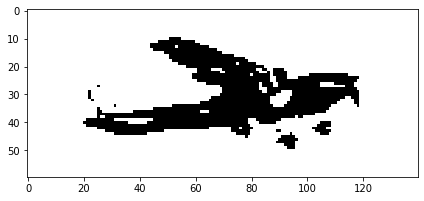

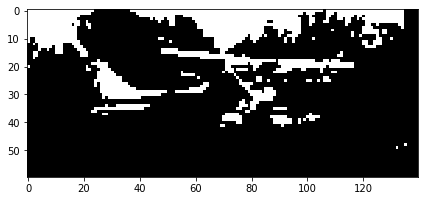

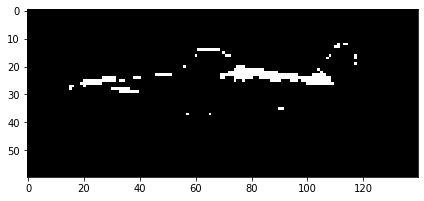

In [8]:
# let's look at some transformed images of positives (airplanes)
for index, row in aircraft_subset.iterrows():
    imname = ci_path + row['img_name'] + '.png'
    img_raw = io.imread(imname)
    gray = color.rgb2gray(img_raw) # remove color
    final_image = img_as_bool(gray) # convert grayscale to boolean
    plt.figure()
    io.imshow(final_image)

### look at transformed images WITHOUT airplanes

(20, 2)


/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


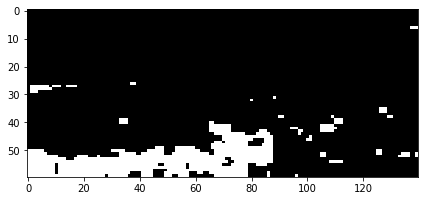

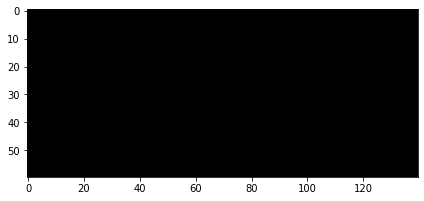

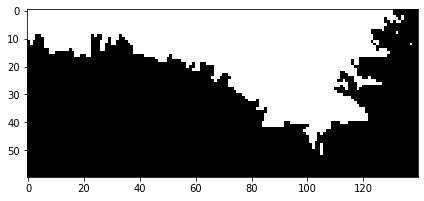

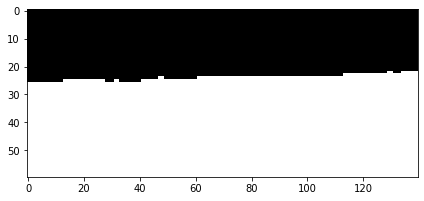

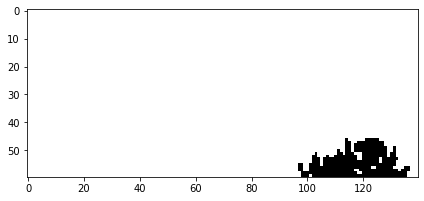

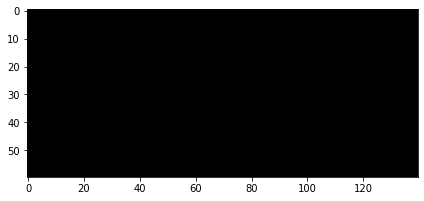

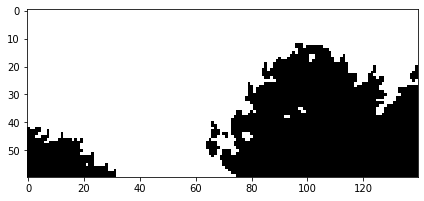

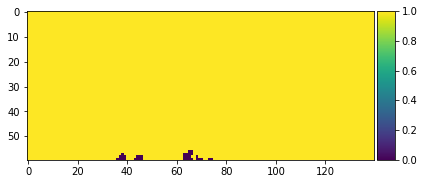

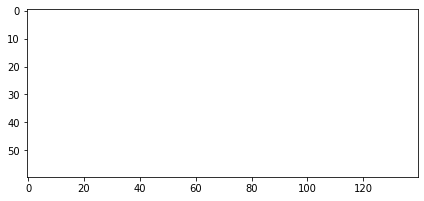

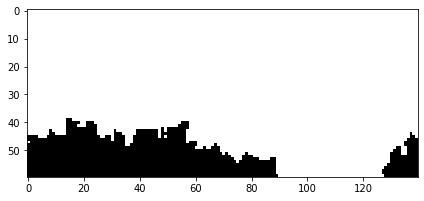

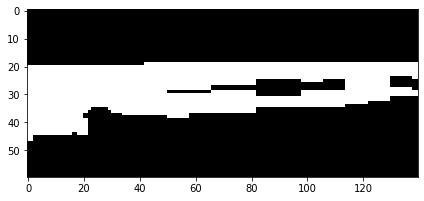

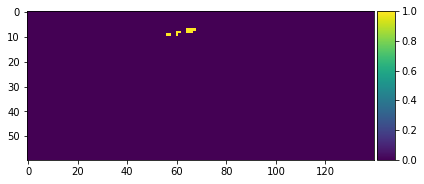

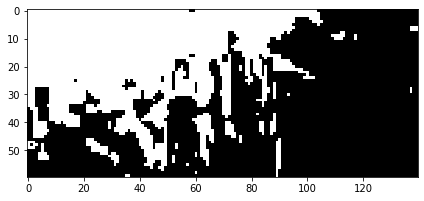

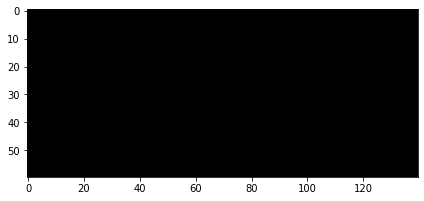

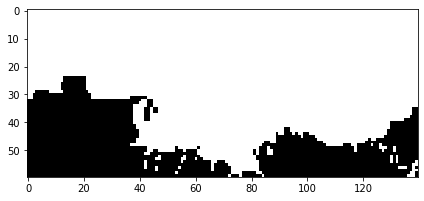

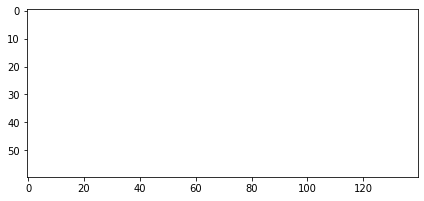

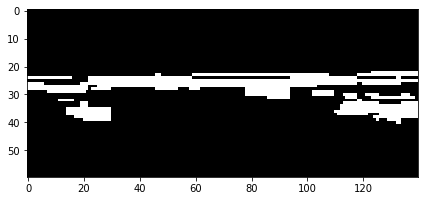

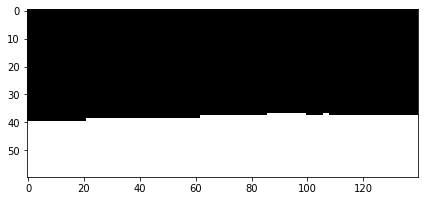

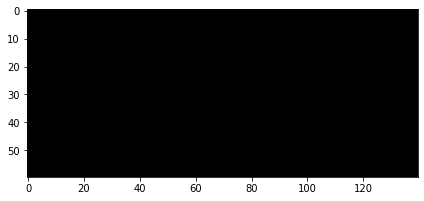

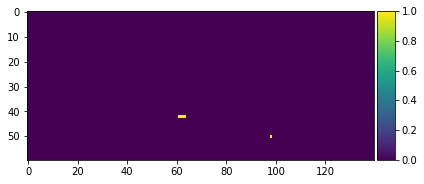

In [9]:
# filter to include only NON airplane images
nonaircraft = plane_data[plane_data['plane']==False]
# take a random subset of 20 of the NON airplane images
nonaircraft_subset = nonaircraft.sample(20)
print(nonaircraft_subset.shape)

# let's look at some transformed images of positives (airplanes)
for index, row in nonaircraft_subset.iterrows():
    imname = ci_path + row['img_name'] + '.png'
    img_raw = io.imread(imname)
    gray = color.rgb2gray(img_raw) # remove color
    final_image = img_as_bool(gray) # convert grayscale to boolean
    plt.figure()
    io.imshow(final_image)